In [1]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 


from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv('titanic-passengers.csv', sep=';')
df

FileNotFoundError: [Errno 2] No such file or directory: 'titanic-passengers.csv'

In [ ]:
df.drop(["Ticket","Cabin"], axis= 1,inplace = True)
df["Age"].fillna(df["Age"].mean(),inplace = True)
df["Embarked"] .fillna('S',inplace = True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

df["Survived"]=LabelEncoder().fit_transform(df["Survived"])
df["Sex"]=LabelEncoder().fit_transform(df["Sex"])

#Survived : 0 = No , 1 = Yes
#Sex : 0 ; Female , 1 = Male

df.head()

In [ ]:

#features extraction
x = df[['Pclass', 'Age','Fare']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance

print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

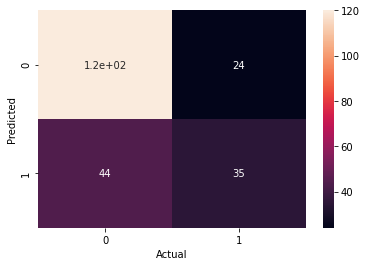

In [24]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

the area under this curve is :
0.6381856540084387


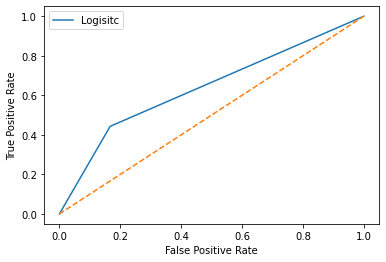

[1.  0.5 0. ]


In [30]:
hiauc = sklearn.metrics.roc_auc_score(y_test, y_pred)
print ("the area under this curve is :")
print (hiauc) # how to display only the first 2 or 3 digits ?



x = [0,1]
fpr,tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, linestyle='-', label='Logisitc')
plt.plot(x, x, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()
print(thresholds/2) #why is the 'thresholds' value excesses '1' ??!

# the RUC graph summarizes all the confusion matrixes that each threshold produces
the x-axis presents the False Positive Rate 
the y-axis presents the True  Positive Rate 
and each point in the graph is calculated in a different threshold!
we chose a point on the graph to calculate the thresholds depends on our demand of FPR and TPR!

# the AUC (area under the Curve) is a way to compare one RUC curve to another
if the AUC of the curve 1 is higher than the AUC of the curve 2 
this means that the curve one is better than the curve 2